# California house price estimation

## Data exploration

In [3]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [256]:
data = pandas.read_csv("housing.csv")

In [257]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07b025ab00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f07adb5bc18>]], dtype=object)

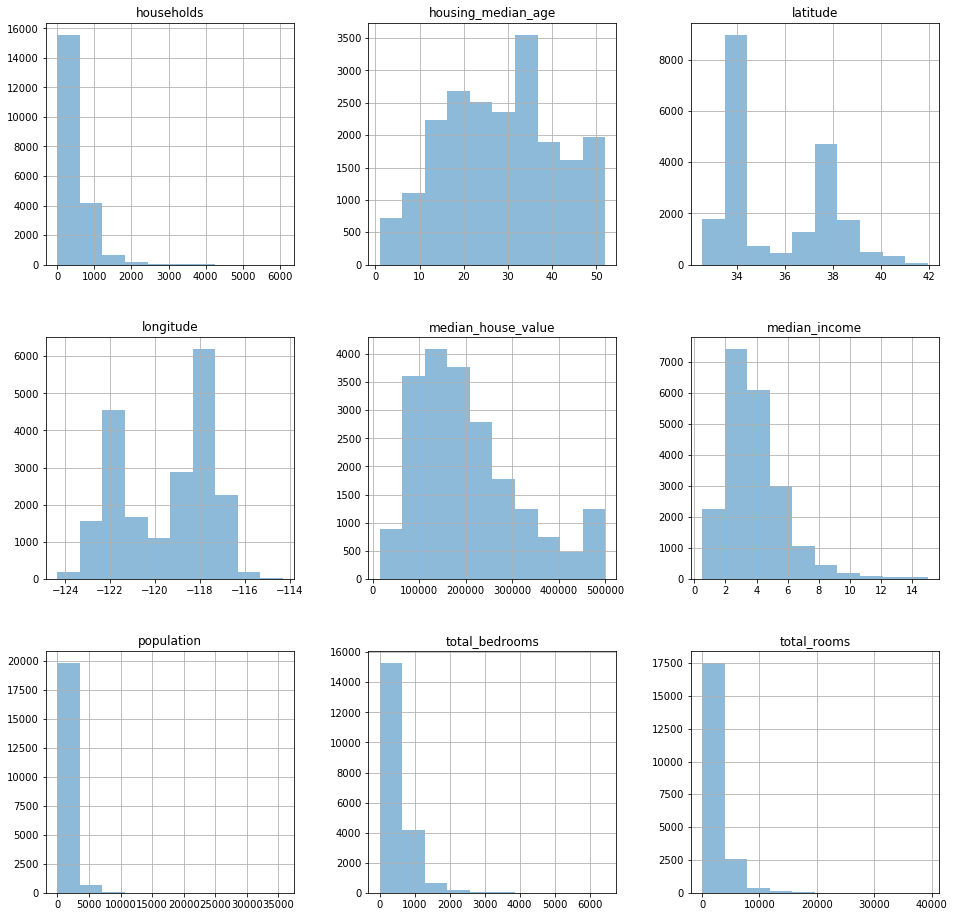

In [7]:
data.hist(figsize=(16, 16), alpha = 0.5)

In [8]:
data["households"].median()

409.0

In [9]:
## Bootstrap plot - Uncertainty in the statistic
#from pandas.plotting import bootstrap_plot
#bootstrap_plot(data, size=50, samples=500, color='grey')

## Preprocessing

### Removing NaNs

In [10]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
#Check for nulls
data["total_bedrooms"].isnull().values.any()
#We have nulls in total_bedrooms. We should decide what to do with that

True

In [12]:
total_bedrooms = data["total_bedrooms"]

In [13]:
#We have Nans only in total_bedrooms. We need to handle this part. Replace with something.
#Let's see a scatter plot of the nBedrooms

In [14]:
#total_bedrooms

In [15]:
#Find the rows where we have nulls
data[pandas.isnull(data['total_bedrooms'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


Seems like we have NaNs in the total_bedrooms. Replacing with the median value of the total_bedrooms for now. We can come to this later.

In [16]:
total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [17]:
total_bedrooms.median()

435.0

In [18]:
data_cleaned = data

In [19]:
data_cleaned["total_bedrooms"] = data_cleaned["total_bedrooms"].fillna(total_bedrooms.median())

In [20]:
#Check if we were successful in removing Nans
data_cleaned.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Scaling and Label encoding

Let's ignore the latitude and longitude for now. We convert these into locations later on. And maybe create some distance features to important landmarks.

In [21]:
from sklearn import preprocessing

In [22]:
numerical_data = ["housing_median_age",'total_rooms','total_bedrooms','population','households','median_income','median_house_value']

In [23]:
categorical_features = ["ocean_proximity"]

In [24]:
skip_columns = ["longitude", "latitude"]

In [25]:
numerical_scaler = preprocessing.StandardScaler().fit(data[numerical_data])

In [26]:
#data[numerical_data]
data_preprocessed = data_cleaned

In [27]:
data_preprocessed[numerical_data] = numerical_scaler.transform(data[numerical_data])

In [28]:
#data_cleaned[categorical_features]

In [29]:
data_preprocessed[numerical_data].describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,8.557001e-16,1.475181e-16,-2.823081e-16,-6.465442e-17,2.139358e-16,3.734255e-16,8.950635e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.196180e+00,-1.207283e+00,-1.277688e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.662641e+00
25%,-8.453931e-01,-5.445698e-01,-5.718868e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-7.561633e-01
50%,2.864572e-02,-2.332104e-01,-2.428309e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-2.353337e-01
75%,6.643103e-01,2.348028e-01,2.537334e-01,2.644949e-01,2.758427e-01,4.593063e-01,5.014973e-01
max,1.856182e+00,1.681558e+01,1.408779e+01,3.025033e+01,1.460152e+01,5.858286e+00,2.540411e+00


#### Label encoding


In [30]:
le = preprocessing.LabelEncoder()

In [31]:
#data_preprocessed[categorical_features]

In [32]:
data_preprocessed[categorical_features].values

array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ..., 
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [33]:
le.fit(data_preprocessed["ocean_proximity"])

LabelEncoder()

In [34]:
#data_preprocessed[categorical_features]

In [35]:
data_preprocessed[categorical_features] = le.transform(data_preprocessed[categorical_features])

/home/satya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model training

Ideas:
Check SVM performance
Check XGboost performance
Draw XGBoost graph

In [36]:
data_preprocessed = data_preprocessed.drop(["latitude","longitude"], axis=1);
data_preprocessed.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,3
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,3
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,3
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,3
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,3


#### Train/Test split

In [37]:
len(data_preprocessed)

20640

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
predictors = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"]
targets = ["median_house_value"]

In [40]:
X = data_preprocessed[predictors]
y = data_preprocessed[targets]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Support vector regression

In [42]:
from sklearn import svm

In [43]:
clf = svm.SVR()

In [44]:
clf.fit(X_train, y_train)

/home/satya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
y_pred = clf.predict(X_test)

##### Measure accuracy

In [46]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [47]:
mean_squared_error(y_test, y_pred)

0.28581290924037672

In [48]:
#SVM squared error - 0.28581290924037578

#### XGBoost

In [49]:
import xgboost as xgb

In [51]:
gbr = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [52]:
xgb_preds = gbr.predict(X_test)

In [53]:
mean_squared_error(y_test, xgb_preds)

0.29981149739197194

#### MLP Regressor

In [60]:
from sklearn.neural_network import MLPRegressor

In [61]:
mlpr = MLPRegressor()

In [62]:
mlpr.fit(X_train, y_train)

/home/satya/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [63]:
mlpr_preds = mlpr.predict(X_test)

In [64]:
mean_squared_error(y_test, mlpr_preds)

0.294131972295268

## Feature engineering

### Feature importances

In [65]:
from xgboost import plot_importance

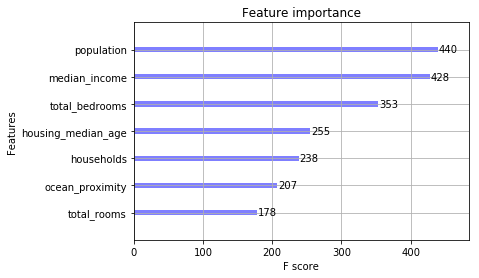

In [72]:
plot_importance(gbr, alpha=0.5, color='b')

Location data probably has a lot of information

Ideas:
    * Cluster coordinates into "regions" - Uptown, downtown
        * Either use geopy to get streets, or cluster using Kmeans or something
    * Create features for distance from famous places, central town, beaches etc.
    * Maybe the NaNs in the max_bedrooms are a feature. Try creating an isNan column.



In [55]:
data["latitude"].describe()

count    20640.000000
mean        35.631861
std          2.135952
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64

In [56]:
data["longitude"].describe()

count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

In [178]:
import geopy
from geopy.geocoders import Nominatim

In [179]:
geolocator = Nominatim()

In [182]:
data["latitude"][0]
data["longitude"][0]

-122.23

In [183]:
location = geolocator.reverse([data["latitude"][0],data["longitude"][0]])

In [75]:
coords = list(zip(data["latitude"], data["longitude"]))

In [76]:
coords

[(37.880000000000003, -122.23),
 (37.859999999999999, -122.22),
 (37.850000000000001, -122.23999999999999),
 (37.850000000000001, -122.25),
 (37.850000000000001, -122.25),
 (37.850000000000001, -122.25),
 (37.840000000000003, -122.25),
 (37.840000000000003, -122.25),
 (37.840000000000003, -122.26000000000001),
 (37.840000000000003, -122.25),
 (37.850000000000001, -122.26000000000001),
 (37.850000000000001, -122.26000000000001),
 (37.850000000000001, -122.26000000000001),
 (37.840000000000003, -122.26000000000001),
 (37.850000000000001, -122.26000000000001),
 (37.850000000000001, -122.26000000000001),
 (37.850000000000001, -122.27),
 (37.850000000000001, -122.27),
 (37.840000000000003, -122.26000000000001),
 (37.840000000000003, -122.27),
 (37.850000000000001, -122.27),
 (37.850000000000001, -122.27),
 (37.840000000000003, -122.27),
 (37.840000000000003, -122.27),
 (37.840000000000003, -122.27),
 (37.850000000000001, -122.28),
 (37.850000000000001, -122.28),
 (37.850000000000001, -122.2

In [190]:
#locations = geolocator.reverse(coords)

In [200]:
#locs = [geolocator.reverse(coord, timeout=10) for coord in coords]

#Geocoder gets too many requests >.>

### Clustering

In [73]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

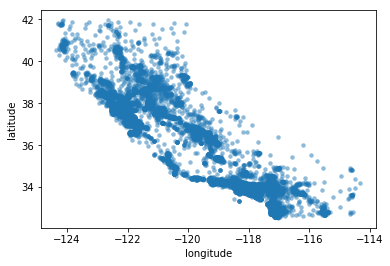

In [123]:
#Let's see what California looks like
ax = data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, linewidth=0)

In [83]:
coords = data.as_matrix(columns=['latitude', 'longitude'])

In [130]:
kms_per_radian = 6371.0088
epsilon = 2.0 / kms_per_radian

In [159]:
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
zone_labels = db.labels_
unique_labels = set(zone_labels)

# get the number of clusters
num_clusters = len(set(zone_labels))
print("Num clusters: %s"%num_clusters)

Num clusters: 111


In [91]:
plt.clf()

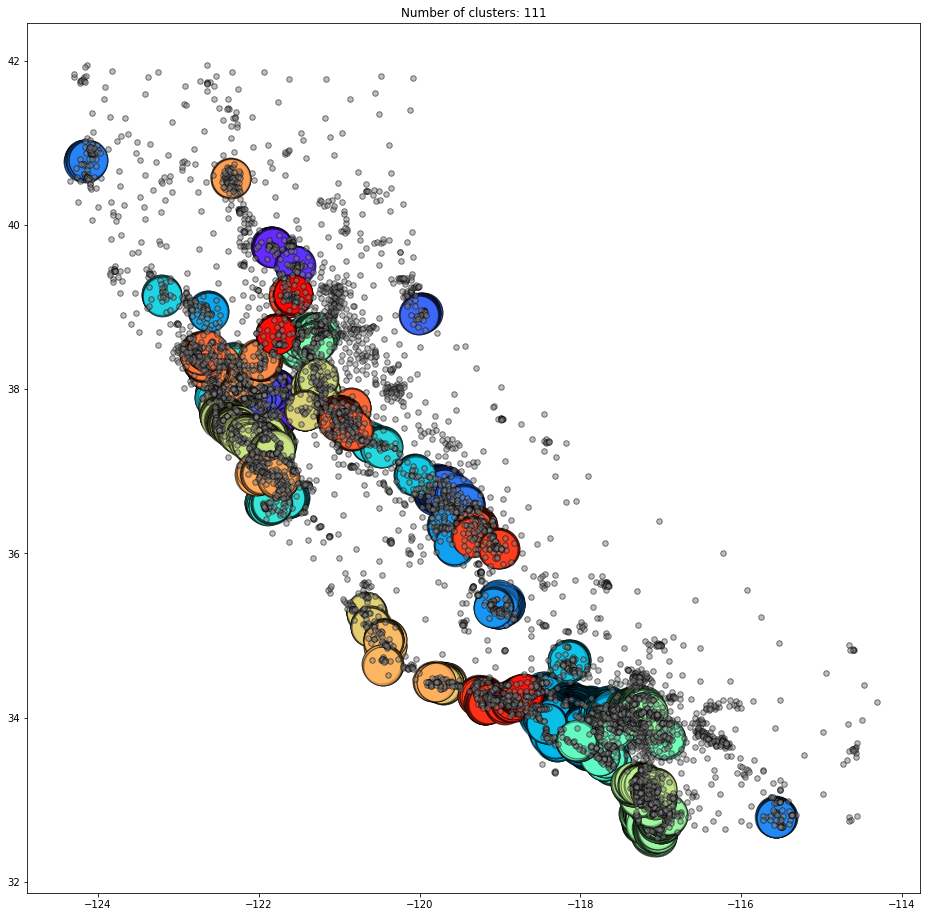

In [160]:
# get colors and plot all the points, color-coded by cluster (or gray if not in any cluster, aka noise)
fig, ax = plt.subplots(figsize=(16, 16))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# for each cluster label and color, plot the cluster's points
for zone_label, color in zip(unique_labels, colors):
    size = 1500
    if zone_label == -1: #make the noise (which is labeled -1) appear as smaller gray points
        color = 'gray'
        size = 30
    
    # plot the points that match the current cluster label
    x_coords = coords[zone_labels==zone_label][:,1]
    y_coords = coords[zone_labels==zone_label][:,0]
    ax.scatter(x=x_coords, y=y_coords, c=color, edgecolor='k', s=size, alpha=0.5)

ax.set_title('Number of clusters: {}'.format(num_clusters))
plt.show()

(array([ 7163.,   386.,  7413.,   401.,  1734.,  1608.,   586.,   430.,
          494.,   425.]),
 array([  -1. ,    9.2,   19.4,   29.6,   39.8,   50. ,   60.2,   70.4,
          80.6,   90.8,  101. ]),
 <a list of 10 Patch objects>)

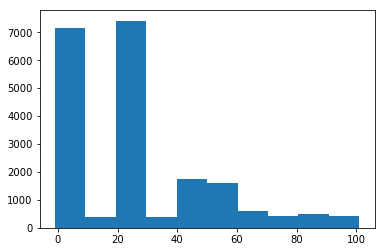

In [125]:
plt.hist(cluster_labels)

In [126]:
#Let's use this new cluster data, and train a better model

In [127]:
data_clustered = data_preprocessed

In [128]:
data_clustered["cluster"] = cluster_labels

In [129]:
data_clustered.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,8.557001e-16,1.475181e-16,-2.823081e-16,-6.465442e-17,2.139358e-16,3.734255e-16,8.950635e-16,1.165843,24.928876
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.420662,24.842325
min,-2.196180e+00,-1.207283e+00,-1.277688e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.662641e+00,0.000000,-1.000000
25%,-8.453931e-01,-5.445698e-01,-5.718868e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-7.561633e-01,0.000000,1.000000
50%,2.864572e-02,-2.332104e-01,-2.428309e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-2.353337e-01,1.000000,23.000000
75%,6.643103e-01,2.348028e-01,2.537334e-01,2.644949e-01,2.758427e-01,4.593063e-01,5.014973e-01,1.000000,42.000000
max,1.856182e+00,1.681558e+01,1.408779e+01,3.025033e+01,1.460152e+01,5.858286e+00,2.540411e+00,4.000000,101.000000


In [133]:
predictors = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity", "cluster"]
targets = ["median_house_value"]
X = data_clustered[predictors]
y = data_clustered[targets]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [135]:
gbr = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [136]:
xgb_clustered_preds = gbr.predict(X_test)

In [137]:
mean_squared_error(y_test, xgb_clustered_preds)

0.26488452097699094

In [138]:
mlpr = MLPRegressor()
mlpr.fit(X_train, y_train)
mlpr_clustered_preds = mlpr.predict(X_test)

/home/satya/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
mean_squared_error(y_test, mlpr_clustered_preds)

0.27969094813686818

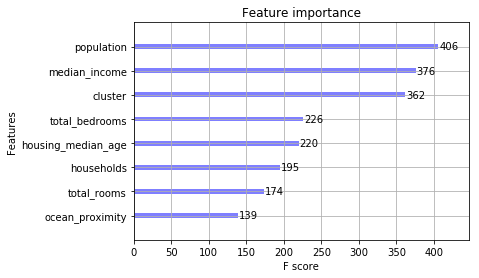

In [140]:
plot_importance(gbr, alpha=0.5, color='b')

In [142]:
import time

In [161]:
# set eps low (1.5km) so clusters are only formed by very close points
epsilon = 1.5 / kms_per_radian

# set min_samples to 1 so we get no noise - every point will be in a cluster even if it's a cluster of 1
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(data), num_clusters, 100*(1 - float(num_clusters) / len(data)), time.time()-start_time))

Clustered 20,640 points down to 3,225 clusters, for 84.4% compression in 1.26 seconds


In [145]:
cluster_labels

array([   0,    1,    1, ..., 3222, 3223, 3224])

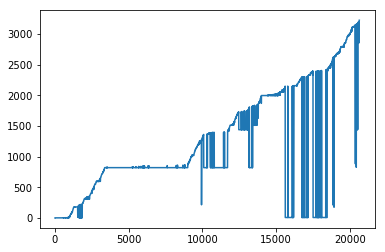

In [162]:
plt.plot(cluster_labels)

In [246]:
data_preprocessed.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster,Zone,Cluster,log_median_income,log_population,log_households,log_total_bedrooms,Population_per_household,Rooms_per_household,Population_per_room,Youngness,Family_Youngness
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,3,0,-1,0,1.207397,-3.666281,-3.773691,-3.592714,0.997335,0.823738,1.210742,-1.007916,-1.005230
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,3,0,0,1,1.203644,0.621350,0.982064,0.857450,0.515844,1.225112,0.421058,-0.704657,-0.363493
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,3,0,0,1,1.023421,-1.719126,-1.855575,-1.754604,0.972904,0.635043,1.532027,-2.261492,-2.200214
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,3,0,0,1,0.659056,-1.452554,-1.323438,-1.271978,1.043946,0.850682,1.227187,-2.423125,-2.529611
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,3,0,0,1,-0.012965,-1.426478,-0.991977,-0.947840,1.207722,0.734958,1.643253,-2.442837,-2.950267


In [239]:
del data_clustered

In [240]:
data_clustered = data_preprocessed
data_clustered["Zone"] = zone_labels
data_clustered["Cluster"] = cluster_labels
data_clustered["Population_per_household"] = data_clustered["population"]/data_clustered["households"]
data_clustered["Population_per_household"] = data_clustered["population"]/data_clustered["households"]
data_clustered["Youngness"] = data_clustered["housing_median_age"]/data_clustered["population"]
data_clustered["Family_Youngness"] = data_clustered["housing_median_age"]/data_clustered["households"]
#data_clustered["Rooms_per_household"] = data_clustered["total_rooms"]/data_clustered["households"]
#data_clustered["Population_per_room"] = data_clustered["population"]/data_clustered["total_rooms"]


In [241]:
data_clustered.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster,Zone,Cluster,log_median_income,log_population,log_households,log_total_bedrooms,Population_per_household,Rooms_per_household,Population_per_room,Youngness,Family_Youngness
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,18318.000000,19841.000000,19689.000000,19835.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,8.557001e-16,1.475181e-16,-2.823081e-16,-6.465442e-17,2.139358e-16,3.734255e-16,8.950635e-16,1.165843,24.928876,28.808818,1108.937742,-0.251590,-0.296542,-0.292242,-0.301085,0.918853,0.793182,2.204261,-0.200132,-0.406547
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.420662,24.842325,28.506400,850.856462,1.055096,0.898440,0.900472,0.898077,13.248559,12.950856,145.713449,62.169581,39.186089
min,-2.196180e+00,-1.207283e+00,-1.277688e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.662641e+00,0.000000,-1.000000,-1.000000,0.000000,-7.649652,-7.075092,-6.193682,-6.649683,-428.219172,-454.864563,-2345.665704,-4409.082280,-1258.667148
25%,-8.453931e-01,-5.445698e-01,-5.718868e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-7.561633e-01,0.000000,1.000000,-1.000000,716.000000,-0.719098,-0.748069,-0.754521,-0.763002,0.547231,0.548483,0.389992,-1.996998,-1.890475
50%,2.864572e-02,-2.332104e-01,-2.428309e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-2.353337e-01,1.000000,23.000000,27.000000,820.000000,-0.067679,-0.224237,-0.223391,-0.250220,0.940899,0.900322,0.948808,-0.538356,-0.532959
75%,6.643103e-01,2.348028e-01,2.537334e-01,2.644949e-01,2.758427e-01,4.593063e-01,5.014973e-01,1.000000,42.000000,53.000000,1683.000000,0.454676,0.258821,0.267910,0.250086,1.205085,1.177512,1.320988,1.008904,0.978403
max,1.856182e+00,1.681558e+01,1.408779e+01,3.025033e+01,1.460152e+01,5.858286e+00,2.540411e+00,4.000000,101.000000,109.000000,3224.000000,1.925458,3.442030,2.747368,2.713886,570.253781,545.274482,16152.842697,2385.586923,1218.080730


In [242]:
predictors = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity", "Zone","Cluster","log_median_income","log_population","log_households","log_total_bedrooms","Population_per_household","Rooms_per_household","Population_per_room","Youngness", "Family_Youngness"]
#predictors = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity","Cluster","Zone"]
targets = ["median_house_value"]
X = data_clustered[predictors]
y = data_clustered[targets]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [234]:
del gbr

In [244]:
gbr = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05).fit(X_train, y_train)
xgb_preds = gbr.predict(X_test)
mean_squared_error(y_test, xgb_preds)

0.24363196556247838

In [258]:
#Inverse transform
target_inv_scaler = preprocessing.StandardScaler()
target_inv_scaler.fit(data["median_house_value"])

/home/satya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [259]:
inv_targets = target_inv_scaler.inverse_transform(y_test)
inv_preds = target_inv_scaler.inverse_transform(xgb_preds)

In [255]:
data["median_house_value"]

0        2.129631
1        1.314156
2        1.258693
3        1.165100
4        1.172900
5        0.544611
6        0.800259
7        0.299362
8        0.171971
9        0.470083
10       0.646870
11       0.302828
12       0.057579
13      -0.134807
14      -0.412988
15      -0.579376
16      -0.471050
17      -0.445052
18      -0.417321
19      -0.380923
20      -0.514381
21      -0.407788
22      -0.805560
23      -0.928618
24      -0.643505
25      -0.861023
26      -0.979747
27      -0.878355
28      -0.848890
29      -0.648704
           ...   
20610   -1.398318
20611   -1.385319
20612   -1.374053
20613   -1.329856
20614   -1.289992
20615   -1.294325
20616   -1.315124
20617   -1.179067
20618   -1.243195
20619   -0.933817
20620   -0.926018
20621   -1.121004
20622   -1.211998
20623   -1.224997
20624   -1.036943
20625   -1.168667
20626   -0.979747
20627   -0.384390
20628   -0.991880
20629   -0.854090
20630   -0.822025
20631   -0.863622
20632   -0.790828
20633   -0.940750
20634   -0

In [266]:
tmp = inv_targets.ravel()

In [270]:
tmp_zip = [tmp, inv_preds]

In [274]:
data["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [273]:
np.sqrt(mean_squared_error(inv_targets, inv_preds))

56956.844742880749

TypeError: object of type 'zip' has no len()

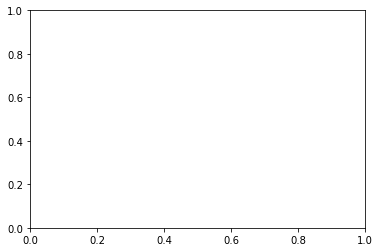

In [262]:
plt.plot(zip(inv_targets, inv_preds), np.arange(len(inv_targets)))

In [254]:
y_test


,median_house_value
20046,-1.379252
3024,-1.395718
15663,2.540411
20484,0.101776
9814,0.616539
13311,-0.417321
7113,-0.075012
7668,-0.427720
18246,1.153834
5723,2.077635


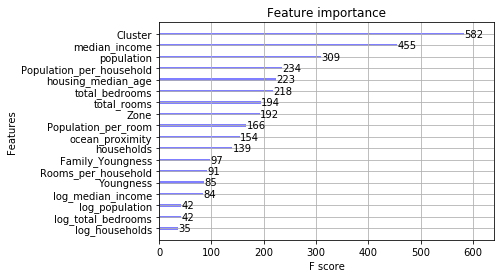

In [245]:
plot_importance(gbr, alpha=0.5, color='b')

In [173]:
mlpr = MLPRegressor()
mlpr.fit(X_train, y_train)
mlpr_clustered_preds = mlpr.predict(X_test)
mean_squared_error(y_test, mlpr_clustered_preds)

/home/satya/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.42642991750097842